In [1]:
import pathlib
import numpy as np

data_dir = pathlib.Path("./data/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  return img


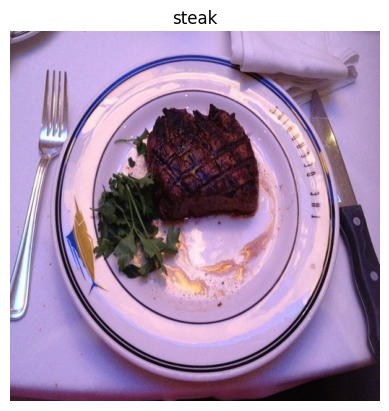

In [3]:
img = view_random_image(target_dir = "./data/pizza_steak/train/",
                        target_class = "steak")

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "./data/pizza_steak/train/"
test_dir = "./data/pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed=42)

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model1.compile(loss="binary_crossentropy",
               optimizer="Adam",
               metrics=["accuracy"])

history1=model1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 47s 975ms/step - loss: 0.6687 - accuracy: 0.5953 - val_loss: 0.5275 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 39s 814ms/step - loss: 0.4741 - accuracy: 0.7927 - val_loss: 0.3904 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 33s 704ms/step - loss: 0.4239 - accuracy: 0.8167 - val_loss: 0.3950 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 33s 706ms/step - loss: 0.3830 - accuracy: 0.8340 - val_loss: 0.3121 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 35s 735ms/step - loss: 0.3517 - accuracy: 0.8560 - val_loss: 0.3131 - val_accuracy: 0.8840
